# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

install of seaborn

In [ ]:
%%bash 
python -m pip install seaborn

Import of library

In [1]:
import tensorflow as tf
import numpy as np
from utils import get_dataset

In [2]:
import logging
from object_detection.inputs import train_input
from object_detection.protos import input_reader_pb2
from object_detection.builders.dataset_builder import build as build_dataset
from object_detection.utils.config_util import get_configs_from_pipeline_file
from waymo_open_dataset import dataset_pb2 as open_dataset

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as Patches
import matplotlib.image as mpimg
import cv2
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import glob

import of dataset

In [7]:
dataset = get_dataset("data/waymo/training_and_validation/*tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/*tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/*tfrecord']
INFO:tensorflow:Number of filenames to read: 97
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


Display of dataset

In [8]:
dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in green, cyclist in blue).

In [9]:
def display_instances(batch):
        
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.

        
    """
    # Create figure and axes
    colors={1:'red',2:'green',4:'blue'}
    col = 1
    row = (10+1)
    i=0
    _, ax = plt.subplots(nrows=10, ncols=1,figsize=(80,80))
    #print(axs)
    for data, a in zip (batch,ax):

        #fig, axs = plt.subplots(2, 2)
        image = data['image'].numpy()
        Classes= data['groundtruth_classes'].numpy()
        Bbox=data['groundtruth_boxes'].numpy()
        width,height,depth=image.shape
        widthScale=width/1
        heigthScale=height/1

        a.imshow(image)
        for cl, box in zip (Classes,Bbox):
            y1,x1,y2,x2=box
            #print(y1,x1,y2,x2)
            x1=x1*widthScale
            x2=x2*widthScale
            y1=y1*heigthScale
            y2=y2*heigthScale
            #print(y1,x1,y2,x2)
            #print(cl)
            rec =Patches.Rectangle((x1,y1),x2-x1,y2-y1,edgecolor=colors[cl],facecolor ='none')
            a.add_patch(rec)     
plt.show() 

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

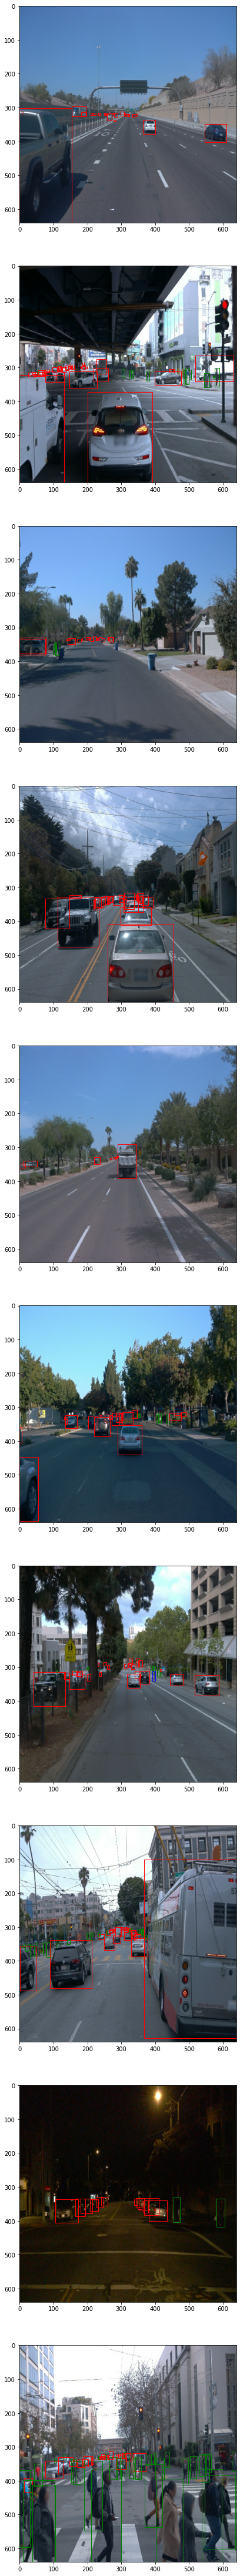

In [10]:
dataset = dataset.shuffle(97)
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
Lets check some (20000) images per trrecord file.


In [11]:
def countobject(FILENAME):
    n=1
    datalist =[]
    objectlabeloverall= {1: 0, 2 : 0, 4: 0 }
    datasets = get_dataset(FILENAME)
    for data in datasets:
        objectlabels = {1: 0, 2 : 0, 4: 0 }
        for m in data['groundtruth_classes'].numpy():
            objectlabels[m]= objectlabels[m]+1
        for u in objectlabeloverall.keys():
            objectlabeloverall[u]=objectlabeloverall[u]+ objectlabels[u] 
        datalist.append(objectlabels)

        if n>20000:
            break
        n=n+1
    return objectlabeloverall,datalist

In [12]:
import glob
files=glob.glob("data/waymo/training_and_validation/*tfrecord")
filesname = []
data = {'FileName':[]}
datam = {'Vehicle':[],
        'Pedestrain':[],
        'Cyclist':[]}
        #'FrameData':[]}
for file in files:
    objectlabeloverall,datalist = countobject(file)
    data['FileName'].append((file.rsplit("/")[-1])
    datam['Vehicle'].append(objectlabeloverall[1])
    datam['Pedestrain'].append(objectlabeloverall[2])
    datam['Cyclist'].append(objectlabeloverall[4])
df_waymo = pd.DataFrame(datam)
print(df_waymo)

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

In [ ]:
df_waymo.index=data['FileName']

In [1]:
# Write pickle file for future use
df_waymo.to_pickle('waymo2.pkl')
# Read the pickle file
df_waymo = pd.read_pickle('waymo2.pkl')
# display the dataframe
print(df_waymo)

                                                    Vehicle  Pedestrain  \
segment-1005081002024129653_5313_150_5333_150_w...   277004       28054   
segment-10963653239323173269_1924_000_1944_000_...   599135       88068   
segment-11017034898130016754_697_830_717_830_wi...   165941        5016   
segment-12179768245749640056_5561_070_5581_070_...   223970       13985   
segment-10096619443888687526_2820_000_2840_000_...    71055           0   
...                                                     ...         ...   
segment-10235335145367115211_5420_000_5440_000_...   673985       21008   
segment-11318901554551149504_520_000_540_000_wi...   662915      240010   
segment-10734565072045778791_440_000_460_000_wi...    46936       29019   
segment-11236550977973464715_3620_000_3640_000_...   602122      701028   
segment-12027892938363296829_4086_280_4106_280_...   485842      171114   

                                                    Cyclist  
segment-1005081002024129653_5313_150_

In [3]:
df_waymo.describe()

,Vehicle,Pedestrain,Cyclist
count,9.700000e+01,97.000000,97.000000
mean,3.600223e+05,107671.175258,2784.958763
std,2.311520e+05,177240.495440,5727.292516
min,1.994000e+03,0.000000,0.000000
25%,1.908550e+05,0.000000,0.000000
50%,3.060880e+05,17986.000000,0.000000
75%,5.260970e+05,159976.000000,2006.000000
max,1.009819e+06,751919.000000,25928.000000


In [4]:
df_waymo.max()

Vehicle       1009819
Pedestrain     751919
Cyclist         25928
dtype: int64

In [34]:
overall=df_waymo.sum(axis = 0, skipna = True)

In [36]:
print (overall)

Vehicle       34922165
Pedestrain    10444104
Cyclist         270141
dtype: int64


There are count of vehicle 34922165 & human 10444104 & Cyclist 270141

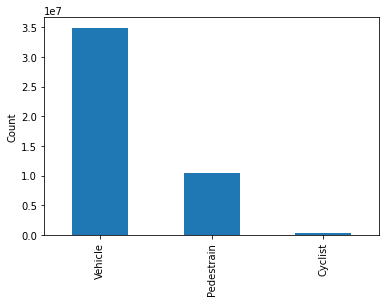

In [35]:
ax = overall.plot.bar()
ax.set(xlabel='', ylabel='Count')
ax.set_yscale('linear')

Frequency of classes in overall dataset

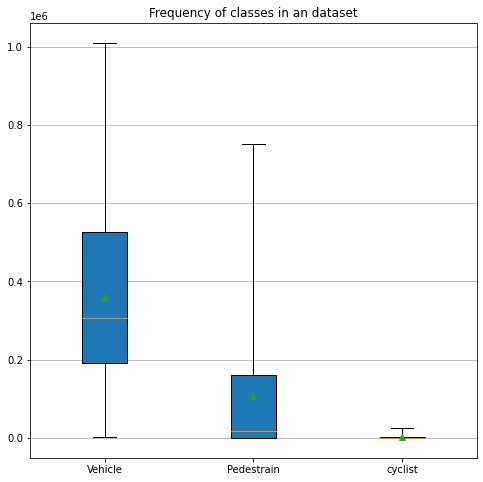

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.yaxis.grid(True)
ax.set_title('Frequency of classes in overall dataset')

bplot = ax.boxplot(df_waymo, whis=[0, 100], showfliers=False, showmeans=True, patch_artist=True)
ax.set_xticklabels(['Vehicle', 'Pedestrain', 'Cyclist'])
plt.show()


Showing the count of the vehicle occurrences in dataset

<Figure size 1080x1080 with 0 Axes>

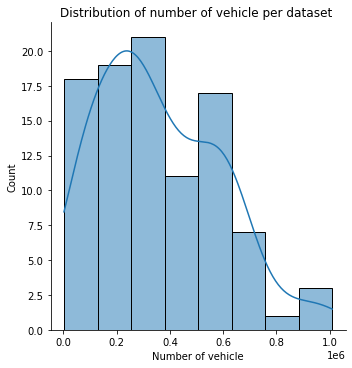

In [23]:
plt.figure(figsize=(15, 15))
ax_cy= sns.displot(df_waymo['Vehicle'], kde=True)
ax_cy.set(xlabel='Number of vehicle', title='Distribution of number of vehicle per dataset ')
plt.show()

showing the count of the Pedestrain occurrences in dataset

<Figure size 1080x1080 with 0 Axes>

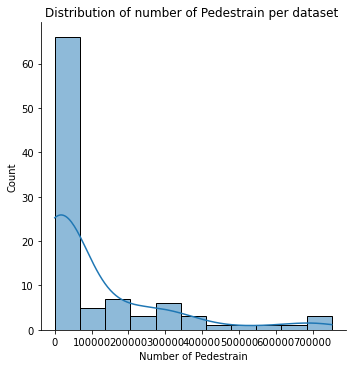

In [26]:
plt.figure(figsize=(15, 15))
ax_cy= sns.displot(df_waymo['Pedestrain'], kde=True)
ax_cy.set(xlabel='Number of Pedestrain', title='Distribution of number of Pedestrain per dataset ')
plt.show()

Kernel density estimation of Cyclist with Pedestrain

C:\Users\M4010\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


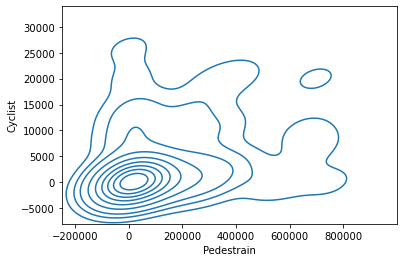

In [29]:
sns.kdeplot(df_waymo['Pedestrain'],df_waymo['Cyclist']);